<a href="https://colab.research.google.com/github/satyam-singh9828/3rd-year-projects-/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving chessboard.png to chessboard.png


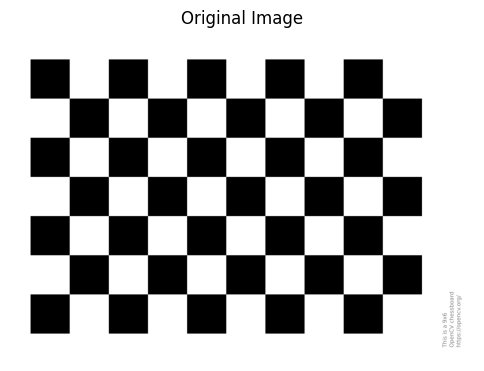

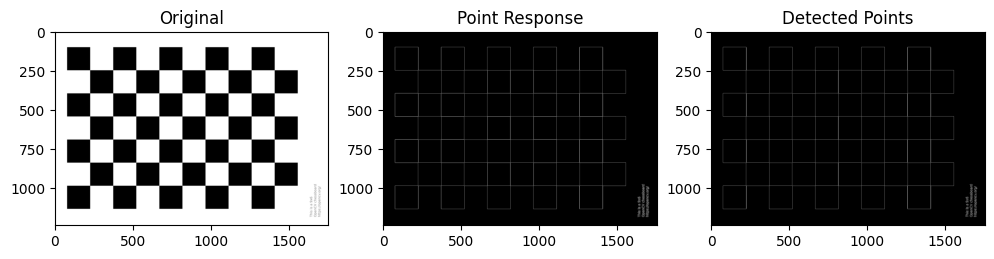

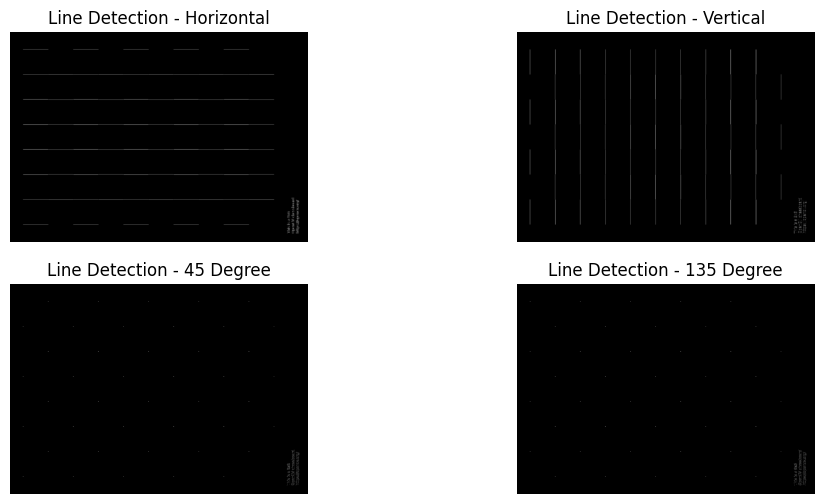

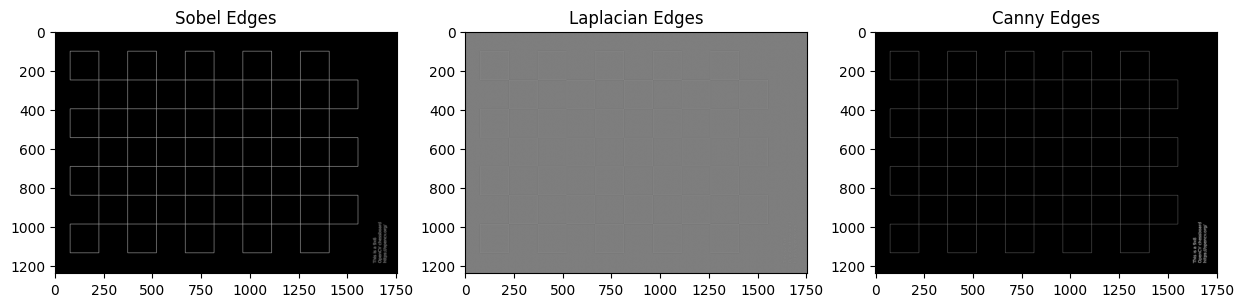

In [ ]:
# ================================
# IMAGE SEGMENTATION NOTEBOOK
# Point Detection | Line Detection | Edge Detection
# ================================

import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Upload Image (for Colab)
# -------------------------
from google.colab import files
uploaded = files.upload()  # Choose an image from your computer

# Auto-detect filename of uploaded image
filename = list(uploaded.keys())[0]

# Read the uploaded image in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

# -------------------------
# 1. POINT DETECTION
# -------------------------
point_kernel = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

point_response = cv2.filter2D(img, -1, point_kernel)
_, point_thresh = cv2.threshold(point_response, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(point_response, cmap='gray'), plt.title("Point Response")
plt.subplot(1,3,3), plt.imshow(point_thresh, cmap='gray'), plt.title("Detected Points")
plt.show()

# -------------------------
# 2. LINE DETECTION
# -------------------------
line_kernels = {
    "Horizontal": np.array([[-1, -1, -1],
                            [ 2,  2,  2],
                            [-1, -1, -1]]),

    "Vertical": np.array([[-1, 2, -1],
                          [-1, 2, -1],
                          [-1, 2, -1]]),

    "45 Degree": np.array([[ 2, -1, -1],
                           [-1,  2, -1],
                           [-1, -1,  2]]),

    "135 Degree": np.array([[-1, -1,  2],
                            [-1,  2, -1],
                            [ 2, -1, -1]])
}

plt.figure(figsize=(12,6))
for i, (name, kernel) in enumerate(line_kernels.items()):
    response = cv2.filter2D(img, -1, kernel)
    plt.subplot(2,2,i+1), plt.imshow(response, cmap='gray')
    plt.title(f"Line Detection - {name}")
    plt.axis("off")
plt.show()

# -------------------------
# 3. EDGE DETECTION
# -------------------------
# Sobel operator
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)

# Laplacian operator
laplacian_edges = cv2.Laplacian(img, cv2.CV_64F)

# Canny Edge detector
canny_edges = cv2.Canny(img, 100, 200)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(sobel_edges, cmap='gray'), plt.title("Sobel Edges")
plt.subplot(1,3,2), plt.imshow(laplacian_edges, cmap='gray'), plt.title("Laplacian Edges")
plt.subplot(1,3,3), plt.imshow(canny_edges, cmap='gray'), plt.title("Canny Edges")
plt.show()


Saving stuff.jpg to stuff.jpg


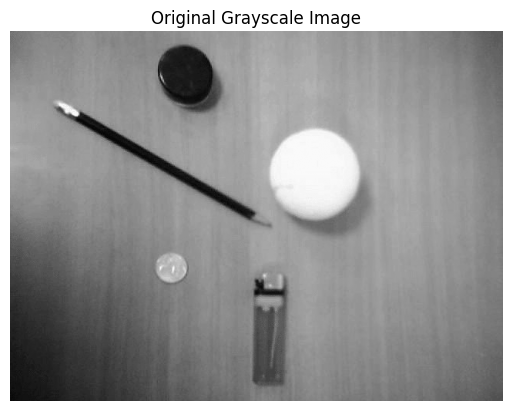

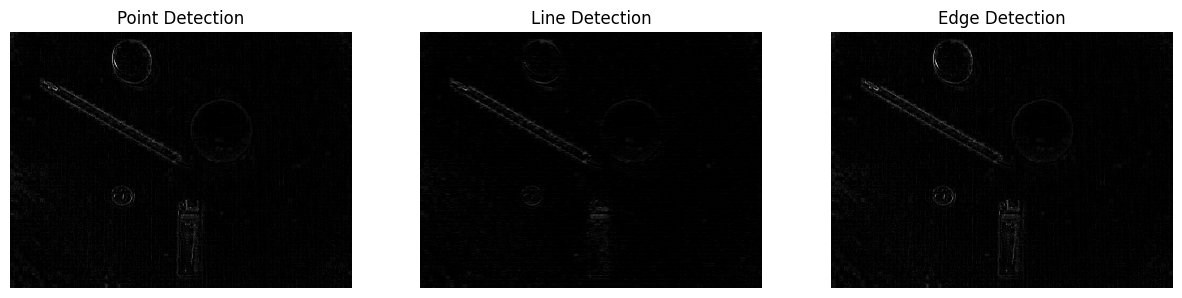

3x3 Patch:
 [[157 157 156]
 [157 157 156]
 [157 157 156]] 

Kernel:
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]] 

Patch * Kernel:
 [[-157 -157 -156]
 [-157 1256 -156]
 [-157 -157 -156]] 

Response Value at (50,50) = 3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload an image from your system
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Step 2: Read and convert to grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

# Step 3: Define masks
point_kernel = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

line_kernel = np.array([[-1, -1, -1],
                        [ 2,  2,  2],
                        [-1, -1, -1]])

edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Step 4: Apply filters
point_resp = cv2.filter2D(img, -1, point_kernel)
line_resp  = cv2.filter2D(img, -1, line_kernel)
edge_resp  = cv2.filter2D(img, -1, edge_kernel)

# Step 5: Show outputs
titles = ['Point Detection', 'Line Detection', 'Edge Detection']
responses = [point_resp, line_resp, edge_resp]

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(responses[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()

# Step 6: Function to show math response at a pixel
def show_convolution_math(img, x, y, kernel):
    patch = img[x-1:x+2, y-1:y+2]
    if patch.shape != (3,3):
        print("Pixel too close to border!")
        return
    print("3x3 Patch:\n", patch, "\n")
    print("Kernel:\n", kernel, "\n")
    multiplied = patch * kernel
    print("Patch * Kernel:\n", multiplied, "\n")
    response = np.sum(multiplied)
    print(f"Response Value at ({x},{y}) = {response}")
    return response

# Example: check convolution math at pixel (50,50) using point kernel
response_value = show_convolution_math(img, 50, 50, point_kernel)


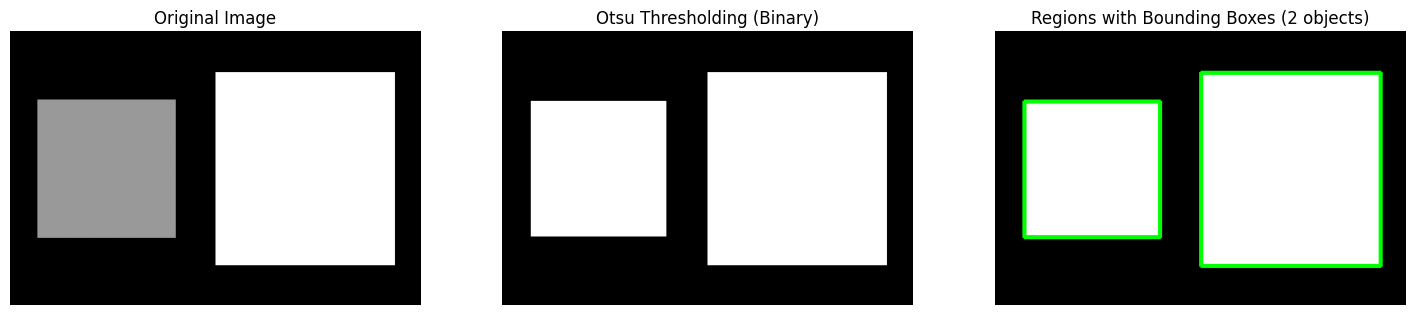

Region 1: Area=18471, BoundingBox=(150,30,131,141)
Region 2: Area=9801, BoundingBox=(21,51,99,99)


In [2]:
# ==========================
# Otsu Thresholding + Region Detection (Simple Bounding Boxes)
# ==========================

import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Load Image ---
# To use your own image in Colab:
# from google.colab import files
# uploaded = files.upload()
# img = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)

# For demo: synthetic grayscale image with two regions
img = np.zeros((200, 300), dtype=np.uint8)
cv2.rectangle(img, (20, 50), (120, 150), 120, -1)   # Gray region
cv2.rectangle(img, (150, 30), (280, 170), 200, -1)  # Bright region

# --- Step 2: Preprocessing ---
blur = cv2.GaussianBlur(img, (5,5), 0)

# --- Step 3: Apply Otsu's Thresholding ---
_, otsu_thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# --- Step 4: Connected Components (region detection) ---
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(otsu_thresh)

# --- Step 5: Convert binary to color for visualization ---
output = cv2.cvtColor(otsu_thresh, cv2.COLOR_GRAY2BGR)

# --- Step 6: Draw bounding boxes only ---
for i in range(1, num_labels):  # skip background (label 0)
    x, y, w, h, area = stats[i]
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)  # simple green box

# --- Step 7: Visualize results ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(otsu_thresh, cmap='gray')
axs[1].set_title("Otsu Thresholding (Binary)")
axs[1].axis("off")

axs[2].imshow(output)
axs[2].set_title(f"Regions with Bounding Boxes ({num_labels-1} objects)")
axs[2].axis("off")

plt.show()

# --- Step 8: Print region info ---
for i in range(1, num_labels):  # skip background
    x, y, w, h, area = stats[i]
    print(f"Region {i}: Area={area}, BoundingBox=({x},{y},{w},{h})")
